In [ ]:
# pip install opencv-python
# !pip install pytesseract
# !pip install wand
# pip install moviepy


In [ ]:
from moviepy.editor import VideoFileClip

# Replace 'input.webm' with the path to your input WebM file
input_file = '"sample dataset.webm'

# Replace 'output.mp4' with the desired output MP4 file name
output_file = 'sample_dataset.mp4'

# Load the WebM video
video_clip = VideoFileClip(input_file)

# Convert and save as MP4
video_clip.write_videofile(output_file, codec='libx264')

print(f"Video converted to {output_file}")


## Easy OCR vs pytesseract for OCR extraction
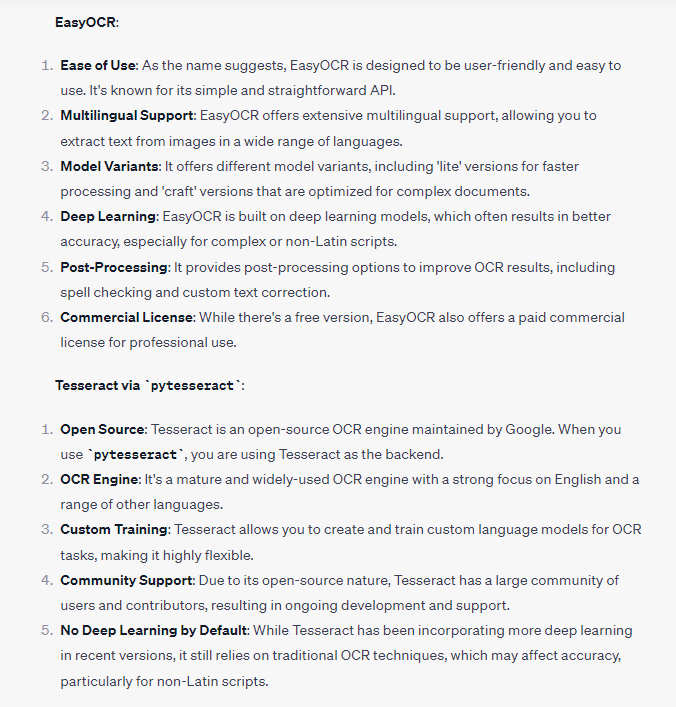
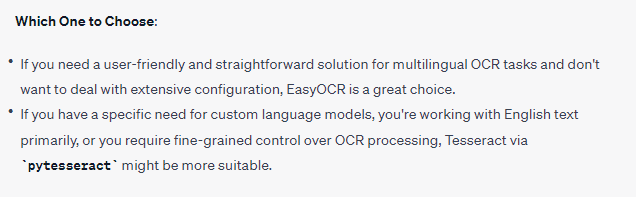

In [1]:
from PIL import Image
import pytesseract
# from wand.image import Image as Img
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import numpy as np
import os
import cv2
image_frames = 'image_frames/'

In [3]:
import cv2

# Open the video file
video_file = 'sample dataset.webm'  # Replace with the path to your video file
cap = cv2.VideoCapture(video_file)

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

frame_rate = cap.get(5)  # Get the frame rate (frames per second)

frame_interval = 1

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        # Save the frame as an image
        frame_filename = './image_frames/'+str(frame_count) +'.png'
        cv2.imwrite(frame_filename, frame)

    frame_count += 1

# Release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


# text extraction using EasyOCR

In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
reader = easyocr.Reader(['en'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [3]:
temp_list = os.listdir(image_frames)

temp_list.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
temp_list = [file for file in temp_list if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
# temp_list

In [6]:
# image_path = os.path.join(image_frames,image)
# print(image_path)

### Algorithm for how to deal with duplicate data
- selecting first frame as reference frame
- 2nd image for comparison
- if same than extract required content than storing it in temp variable
- checking third frame
     - if simmilar than extracting content and appending to temp varibale
     - if different then appending temp variable to  first frame and moving to other frame and
     - starting fresh operation on that frame
 
 - and so on for next frames

In [7]:
for image in temp_list[122:124]:
    image_path = os.path.join(image_frames,image)
    result = reader.readtext(image_path)
    result = np.take(np.array(result), indices=[1], axis=1)
    result =  ' '.join(item[0] for item in result)
    print(result)
    print('-_'*30)

C:\Users\10710548\AppData\Local\Temp\ipykernel_22536\3990413746.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.take(np.array(result), indices=[1], axis=1)


You Dat Unc (24 Atte Unc Mir Lar Nat Unt ash Am 6 > € google com/search?q-ocr-video+dataset&source-Imnsabih-931&biw= 19208rlz-1C1GCEA_enIN1O44IN1044&hl-en&sa-X&ved= ZahUKEwiX6pfmyq6CAxX8m ZMGHazIA4MQ_AUoAHoECAEQAA Relaunch to updlate Favorites Fowdo steppern_ Raspberry Pi Tutori_ DealeXtreme Cccl; https;/www course Water Leve Control loT Projects__ Working principle a, Simple Prcximity Se__ Welcomel Welcom; Career Ropotics  . AIl Bookmarks Google ocr video dataset Converse Videos Images Books News More Tools SafeSearch Papers With Code https  Ipaperswitncode com datasets Machine Learning Datasets 41 dataset results for Optical Character Recognition (OCR) IAM (IAM The video was recorded using static camera in early 2015. PAPERS BENCHMARK People also ask What is OCR in video? How do create dataset in OCR? What is Chars74K dataset? Does OCR use CNN? Feedback GitHub https IIgithub.com , xinke-wang OCRDatasets xinke-wang/OCRDatasets: A collection of OCR-related 07-Sept-2022 OCR Datasets. Th

## Comparing two frames and extracting unique Content from it 
- ### First the Algorithms to consider for required use case is Mentioned
- ### Then The Observation by implementing those Algorithms for my requied use case is written
- ### Followed by the code used for implementing those algorithms (For testing algorithms and comparison fast, these algorithms are generated using ChatGPT) 

## Algorithms Option 1
<!-- ![image.png](attachment:image.png) -->
https://stackoverflow.com/questions/15303631/what-are-some-algorithms-for-comparing-how-similar-two-strings-are

# Algorithms Options 2 
- **Smith-Waterman Algorithm:** This is a local sequence alignment algorithm used in bioinformatics for comparing DNA, RNA, or protein sequences.

- **Sørensen-Dice Coefficient:** It is used for comparing the similarity between two sets by measuring the size of their intersection relative to the size of the sets themselves.

- **N-grams:** You can break down strings into n-grams (substrings of length n) and then compare the n-grams to measure similarity.

- **Longest Common Subsequence (LCS):** It's used to find the longest subsequence that two sequences have in common. This is useful for finding common elements in strings.

## Observations

### I used Chat GPT to generate above algorithms and check for my required use case to add only unique content to existing sentence and made the following observations:
- *smith-waterman algorithm* : <u>It does not gave any result for unique sequence</u> and the **reason is** The Smith-Waterman algorithm is a sequence alignment algorithm designed for comparing sequences with gaps. However, it's typically used for biological sequences and might not be the best choice for general text comparison tasks.
- *Both n-gram and Sorensen-Dice Coefficient:* <u>were not mantaining the order of words and giving random order in unique value output</u> and **reason is** Both n-grams and Sørensen-Dice coefficient methods do not maintain the order of the content, and they focus on identifying common substrings or n-grams between the sentences. Therefore, they may not be suitable for extracting unique content if the order of words is important. These methods are based on set or substring matching and do not take into account the sequence of words.

- *Longest Common Subsequence(LCS) :* <u>was only giving the proper output for unique content</u> but the limitation which I am facing is that if once a word is there in unique content then it is not again comming in the unique content list

# Testing Longest Common SubSequence (LCS)

In [16]:
from difflib import SequenceMatcher

def preprocess_sentence(sentence):
    # Tokenize, remove punctuation, and convert to lowercase
    tokens = sentence.lower().split()
    return [token.strip(".,!?") for token in tokens]

def lcs_similarity(sentence1, sentence2):
    tokens1 = preprocess_sentence(sentence1)
    tokens2 = preprocess_sentence(sentence2)

    # Calculate the LCS using the SequenceMatcher
    seq_matcher = SequenceMatcher(None, tokens1, tokens2)
    lcs = seq_matcher.find_longest_match(0, len(tokens1), 0, len(tokens2))

    # Calculate the LCS length and total length of sentence2
    lcs_length = lcs.size
    total_length = len(tokens2)

    return lcs_length, total_length

def find_unique_content(sentence1, sentence2):
    lcs_length, total_length = lcs_similarity(sentence1, sentence2)
    threshold = 0.6  # Adjust as needed

    if lcs_length <= threshold * total_length:
        # Filter out the unique content from sentence2
        tokens1 = preprocess_sentence(sentence1)
        tokens2 = preprocess_sentence(sentence2)
        unique_tokens = [token for token in tokens2 if token not in tokens1]
        return " ".join(unique_tokens)
    else:
        return None

# Example sentences
main_sentence = "i am maninder singh"
other_sentence = "i am maninder singh and i study data science maninder singh as am"

unique_content = find_unique_content(main_sentence, other_sentence)
if unique_content:
    print("Unique content:", unique_content)
else:
    print("No unique content found.")


Unique content: and study data science as


In [17]:
from difflib import SequenceMatcher

def preprocess_sentence(sentence):
    # Tokenize, remove punctuation, and convert to lowercase
    tokens = sentence.lower().split()
    return [token.strip(".,!?") for token in tokens]

def lcs_similarity(sentence1, sentence2):
    tokens1 = preprocess_sentence(sentence1)
    tokens2 = preprocess_sentence(sentence2)

    # Calculate the LCS using the SequenceMatcher
    seq_matcher = SequenceMatcher(None, tokens1, tokens2)
    lcs = seq_matcher.find_longest_match(0, len(tokens1), 0, len(tokens2))

    # Calculate the LCS length and total length of sentence2
    lcs_length = lcs.size
    total_length = len(tokens2)

    return lcs_length, total_length

def find_unique_content(sentence1, sentence2):
    lcs_length, total_length = lcs_similarity(sentence1, sentence2)
    threshold = 0.6  # Adjust as needed

    if lcs_length <= threshold * total_length:
        # Filter out the unique content from sentence2
        tokens1 = preprocess_sentence(sentence1)
        tokens2 = preprocess_sentence(sentence2)
        
        seen_words = set()  # Set to store words from the main sentence
        unique_tokens = []
        
        for token in tokens2:
            if token not in tokens1 and token not in seen_words:
                unique_tokens.append(token)
                seen_words.add(token)
        
        return " ".join(unique_tokens)
    else:
        return None

# Example sentences
main_sentence = "i am maninder singh"
other_sentence = "i am maninder singh and i study data science maninder singh as am"

unique_content = find_unique_content(main_sentence, other_sentence)
if unique_content:
    print("Unique content:", unique_content)
else:
    print("No unique content found.")


Unique content: and study data science as


### 2nd way of implementign LCS

In [11]:
def longest_common_subsequence(X, Y):
    m, n = len(X), len(Y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    i, j = m, n
    lcs = []
    while i > 0 and j > 0:
        if X[i - 1] == Y[j - 1]:
            lcs.append(X[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            i -= 1
        else:
            j -= 1

    return " ".join(reversed(lcs))

main_sentence = "This is the main sentence."
other_sentence = "This is a sentence with some unique content."

lcs = longest_common_subsequence(main_sentence.split(), other_sentence.split())
unique_content = " ".join(word for word in other_sentence.split() if word not in lcs)

print("Longest Common Subsequence:", lcs)
print("Unique content:", unique_content)


Longest Common Subsequence: This is
Unique content: a sentence with some unique content.


# Using Smith-Waterman Algorithm

In [8]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def preprocess_sentence(sentence):
    # Tokenize, remove punctuation, and convert to lowercase
    tokens = sentence.lower().split()
    return [token.strip(".,!?") for token in tokens]

def smith_waterman_similarity(sentence1, sentence2):
    tokens1 = preprocess_sentence(sentence1)
    tokens2 = preprocess_sentence(sentence2)

    # Convert token lists back to strings
    tokens1_str = " ".join(tokens1)
    tokens2_str = " ".join(tokens2)

    # Calculate the Smith-Waterman alignment score
    alignments = pairwise2.align.localxx(tokens1_str, tokens2_str, one_alignment_only=True)
    best_alignment = alignments[0]
    best_alignment_score = best_alignment[2]

    return best_alignment_score

def find_unique_content(sentence1, sentence2):
    sw_score = smith_waterman_similarity(sentence1, sentence2)
    threshold = 0.6  # Adjust as needed

    if sw_score <= threshold:
        # Extract the best-matching substring from sentence2
        tokens1 = preprocess_sentence(sentence1)
        tokens2 = preprocess_sentence(sentence2)
        tokens1_str = " ".join(tokens1)
        tokens2_str = " ".join(tokens2)
        best_alignment = pairwise2.align.localxx(tokens1_str, tokens2_str, one_alignment_only=True)[0]
        best_matching_substring = tokens2[best_alignment[3]:best_alignment[4]]

        # Convert the substring tokens back to a string
        best_matching_substring_str = " ".join(best_matching_substring)

        # Filter out the unique content from sentence2
        unique_content = sentence2.replace(best_matching_substring_str, "")
        return unique_content.strip()

    return None

# Example sentences
main_sentence = "This is the main sentence."
other_sentence = "This is a sentence with some unique content."

unique_content = find_unique_content(main_sentence, other_sentence)
if unique_content:
    print("Unique content:", unique_content)
else:
    print("No unique content found.")


No unique content found.


# Using Sorensen-Dice coefficient

In [9]:
def preprocess_sentence(sentence):
    # Tokenize, remove punctuation, and convert to lowercase
    tokens = sentence.lower().split()
    return set([token.strip(".,!?") for token in tokens])

def dice_coefficient_similarity(sentence1, sentence2):
    # Preprocess the sentences
    tokens1 = preprocess_sentence(sentence1)
    tokens2 = preprocess_sentence(sentence2)

    # Calculate the Sørensen-Dice Coefficient
    intersection = len(tokens1.intersection(tokens2))
    dice_coefficient = (2.0 * intersection) / (len(tokens1) + len(tokens2))

    return dice_coefficient

def find_unique_content(sentence1, sentence2):
    dice_similarity = dice_coefficient_similarity(sentence1, sentence2)
    threshold = 0.6  # Adjust as needed

    if dice_similarity <= threshold:
        # Extract the unique content
        unique_tokens = preprocess_sentence(sentence2) - preprocess_sentence(sentence1)
        unique_content = " ".join(unique_tokens)

        return unique_content

    return None

# Example sentences
main_sentence = "This is the main sentence."
other_sentence = "This is a sentence with some unique content."

unique_content = find_unique_content(main_sentence, other_sentence)
if unique_content:
    print("Unique content:", unique_content)
else:
    print("No unique content found.")


Unique content: unique with content a some


# Using n-gram

In [10]:
import nltk
from nltk.util import ngrams
nltk.download('punkt')

def preprocess_sentence(sentence):
    # Tokenize and preprocess the sentence
    tokens = nltk.word_tokenize(sentence.lower())
    return tokens

def calculate_ngram_similarity(sentence1, sentence2, n):
    # Preprocess the sentences
    tokens1 = preprocess_sentence(sentence1)
    tokens2 = preprocess_sentence(sentence2)

    # Generate n-grams for each sentence
    ngrams1 = list(ngrams(tokens1, n))
    ngrams2 = list(ngrams(tokens2, n))

    # Calculate Jaccard similarity between n-grams
    set1 = set(ngrams1)
    set2 = set(ngrams2)

    # Calculate Jaccard similarity
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    jaccard_similarity = intersection / union

    return jaccard_similarity

def find_unique_content(sentence1, sentence2, n, threshold):
    ngram_similarity = calculate_ngram_similarity(sentence1, sentence2, n)

    if ngram_similarity <= threshold:
        # Extract the unique content
        unique_tokens = set(preprocess_sentence(sentence2)) - set(preprocess_sentence(sentence1))
        unique_content = " ".join(unique_tokens)

        return unique_content

    return None

# Example sentences
main_sentence = "This is the main sentence."
other_sentence = "This is a sentence with some unique content."

n = 3  # Adjust the n-gram size as needed
threshold = 0.6  # Adjust as needed

unique_content = find_unique_content(main_sentence, other_sentence, n, threshold)
if unique_content:
    print("Unique content:", unique_content)
else:
    print("No unique content found.")


Unique content: unique with content a some


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10710548\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
